In [1]:
import pandas as pd

In [2]:
train2 = pd.read_csv('./amazon.csv')

In [3]:
train1_list2=train2

In [4]:
train1_list2['discounted_price'] = train1_list2['discounted_price'].str.replace("₹",'')
train1_list2['discounted_price'] = train1_list2['discounted_price'].str.replace(",",'')
train1_list2['discounted_price'] = train1_list2['discounted_price'].astype('float64')
#제품의 할인된 가격 데이터들의 단위와 콤마를 지우고 실수형으로 바꿔줍니다

In [5]:
train1_list2['actual_price'] = train1_list2['actual_price'].str.replace("₹",'')
train1_list2['actual_price'] = train1_list2['actual_price'].str.replace(",",'')
train1_list2['actual_price'] = train1_list2['actual_price'].astype('float64')
#마찬가지로 제품의 실제 가격 데이터들의 단위와 콤마를 지우고 실수형으로 바꿔줍니다

In [6]:
train1_list2['discount_percentage'] = train1_list2['discount_percentage'].str.replace('%','').astype('float64')
#제품의 할인율 데이터들의 퍼센트를 지우고 실수형으로 바꿔줍니다

In [7]:
train1_list2.drop(train1_list2.loc[train1_list2['rating']=='|'].index, inplace=True)
#소비자가 평가한 점수 데이터에 이상치가 있는 행을 지워 해결합니다

In [8]:
train1_list2['rating']=train1_list2['rating'].astype('float64')
#다시 소비자가 평가한 점수 데이터들을 실수형으로 바꿔줍니다

In [9]:
train1_list2['rating_count'] = train1_list2['rating_count'].str.replace(',', '').astype('float64')
#평가에 투표한 사람 수 데이터들의 콤마를 지우고 실수형으로 바꿔줍니다

In [10]:
train1_list2.loc[train1_list2['rating'] >= 4.3, 'new_rating'] = 'A'
train1_list2.loc[(train1_list2['rating'] >= 4.1) & (train1_list2['rating'] < 4.3), 'new_rating'] = 'B'
train1_list2.loc[train1_list2['rating'] <= 4.0, 'new_rating'] = 'C'

In [11]:
train1_list2=train1_list2.dropna()

In [12]:
train1_list2['discount_percentage'] = train1_list2['discount_percentage']/100
#할인율은 퍼센트이기때문에 100 나눠준다

C:\Users\hk679\AppData\Local\Temp\ipykernel_55856\235877077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1_list2['discount_percentage'] = train1_list2['discount_percentage']/100


In [13]:
list_b = ['discounted_price','actual_price', 'discount_percentage','rating','rating_count']
train1_list3 = train2.loc[:, list_b]
train1_list3.head()

,discounted_price,actual_price,discount_percentage,rating,rating_count
0,399.0,1099.0,64.0,4.2,24269.0
1,199.0,349.0,43.0,4.0,43994.0
2,199.0,1899.0,90.0,3.9,7928.0
3,329.0,699.0,53.0,4.2,94363.0
4,154.0,399.0,61.0,4.2,16905.0


In [14]:
correlation_matrix = train1_list3
print(correlation_matrix)

      discounted_price  actual_price  discount_percentage  rating  \
0                399.0        1099.0                 64.0     4.2   
1                199.0         349.0                 43.0     4.0   
2                199.0        1899.0                 90.0     3.9   
3                329.0         699.0                 53.0     4.2   
4                154.0         399.0                 61.0     4.2   
...                ...           ...                  ...     ...   
1460             379.0         919.0                 59.0     4.0   
1461            2280.0        3045.0                 25.0     4.1   
1462            2219.0        3080.0                 28.0     3.6   
1463            1399.0        1890.0                 26.0     4.0   
1464            2863.0        3690.0                 22.0     4.3   

      rating_count  
0          24269.0  
1          43994.0  
2           7928.0  
3          94363.0  
4          16905.0  
...            ...  
1460        1090.0  
146

In [66]:
train1_list2['new_rating'].value_counts()

C    534
B    472
A    456
Name: new_rating, dtype: int64

In [15]:
import pandas as pd
import torch
from torch.utils.data import TensorDataset
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

C:\Users\hk679\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\hk679\anaconda3\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (4.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn(


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments


In [17]:
train1_list2['combined_text'] = train1_list2.apply(
    lambda row: row['review_title'] + ' [SEP] ' + row['review_content'], axis=1
)

C:\Users\hk679\AppData\Local\Temp\ipykernel_55856\3425121526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1_list2['combined_text'] = train1_list2.apply(


In [18]:
# Function to train a model
def train_model(text_column, label_column, model_name_suffix):
    # Encode the labels as numbers
    labels = {'A': 0, 'B': 1, 'C': 2}
    train1_list2['encoded_rating'] = train1_list2[label_column].map(labels)

    # Split the dataset
    X_train, X_val, y_train, y_val = train_test_split(
        train1_list2[text_column], train1_list2['encoded_rating'], test_size=0.2
    )

    # Load the tokenizer and model from the BERT base
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

    # Tokenize and align the labels with the tokenized inputs
    train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=512)
    val_encodings = tokenizer(X_val.tolist(), truncation=True, padding=True, max_length=512)

    # Convert to torch Dataset
    class ReviewDataset(torch.utils.data.Dataset):
        def __init__(self, encodings, labels):
            self.encodings = encodings
            self.labels = labels

        def __getitem__(self, idx):
            item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
            item['labels'] = torch.tensor(self.labels[idx])
            return item

        def __len__(self):
            return len(self.labels)

    train_dataset = ReviewDataset(train_encodings, y_train.tolist())
    val_dataset = ReviewDataset(val_encodings, y_val.tolist())

    # Define the training arguments
    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=3,
        per_device_train_batch_size=8,
        warmup_steps=500,
        weight_decay=0.01,
        evaluation_strategy="epoch"
    )

    # Initialize the Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset
    )

    # Train the model
    trainer.train()

    # Evaluate the model
    evaluation_results = trainer.evaluate()

    # Save the model
    model.save_pretrained(f'./model_{model_name_suffix}')

    return evaluation_results

In [28]:
#content_eval_results = train_model('review_content', 'new_rating', 'content')

C:\Users\hk679\AppData\Local\Temp\ipykernel_49876\2502622132.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1_list2['encoded_rating'] = train1_list2[label_column].map(labels)
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,No log,1.085160
2,No log,1.028503
3,No log,0.922435


In [43]:
#tokenizer.save_pretrained('model_content')

NameError: name 'tokenizer' is not defined

In [55]:
#title_eval_results = train_model('review_title', 'new_rating', 'title')

C:\Users\hk679\AppData\Local\Temp\ipykernel_49876\2502622132.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1_list2['encoded_rating'] = train1_list2[label_column].map(labels)
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,No log,1.058677
2,No log,0.985992
3,No log,0.918288


In [62]:
#combined_eval_results = train_model('combined_text', 'new_rating', 'combined')

C:\Users\hk679\AppData\Local\Temp\ipykernel_49876\2502622132.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1_list2['encoded_rating'] = train1_list2[label_column].map(labels)
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,No log,1.071689
2,No log,1.107663
3,No log,0.894035


In [21]:
print("Content Model Evaluation:", content_eval_results)
print("------------------------------------------------------------------------------")
print("Title Model Evaluation:", title_eval_results)
print("------------------------------------------------------------------------------")
print("Combined Model Evaluation:", combined_eval_results)

Content Model Evaluation: {'eval_loss': 0.9224347472190857, 'eval_runtime': 303.8821, 'eval_samples_per_second': 0.964, 'eval_steps_per_second': 0.122, 'epoch': 3.0}
------------------------------------------------------------------------------
Title Model Evaluation: {'eval_loss': 0.9182882905006409, 'eval_runtime': 38.2325, 'eval_samples_per_second': 7.664, 'eval_steps_per_second': 0.968, 'epoch': 3.0}
------------------------------------------------------------------------------
Combined Model Evaluation: {'eval_loss': 0.8940354585647583, 'eval_runtime': 330.6187, 'eval_samples_per_second': 0.886, 'eval_steps_per_second': 0.112, 'epoch': 3.0}


In [35]:
content_accuracy = content_eval_results.get('eval_accuracy', 'No accuracy data')
title_accuracy = title_eval_results.get('eval_accuracy', 'No accuracy data')
combined_accuracy = combined_eval_results.get('eval_accuracy', 'No accuracy data')

In [36]:
print(f"Content Model Accuracy: {content_accuracy}")
print(f"Title Model Accuracy: {title_accuracy}")
print(f"Combined Model Accuracy: {combined_accuracy}")

Content Model Accuracy: No accuracy data
Title Model Accuracy: No accuracy data
Combined Model Accuracy: No accuracy data


In [71]:
#json 파일로 저장

In [18]:
import json

In [77]:
#def save_results(results, filename):
    #with open(filename, 'w') as file:
        #json.dump(results, file, indent=4)

In [75]:
#save_results(content_eval_results, 'content_eval_results.json')
#save_results(title_eval_results, 'title_eval_results.json')
#save_results(combined_eval_results, 'combined_eval_results.json')

In [72]:
#json 파일 불러오기

In [19]:
def load_results(filename):
    with open(filename, 'r') as file:
        return json.load(file)

In [20]:
content_eval_results = load_results('content_eval_results.json')
title_eval_results = load_results('title_eval_results.json')
combined_eval_results = load_results('combined_eval_results.json')

In [45]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [47]:
#tokenizer.save_pretrained('model_content')

('model_content\\tokenizer_config.json',
 'model_content\\special_tokens_map.json',
 'model_content\\vocab.txt',
 'model_content\\added_tokens.json')

In [57]:
#tokenizer.save_pretrained('model_title')

('model_title\\tokenizer_config.json',
 'model_title\\special_tokens_map.json',
 'model_title\\vocab.txt',
 'model_title\\added_tokens.json')

In [64]:
#tokenizer.save_pretrained('model_combined')

('model_combined\\tokenizer_config.json',
 'model_combined\\special_tokens_map.json',
 'model_combined\\vocab.txt',
 'model_combined\\added_tokens.json')

In [22]:
tokenizer = BertTokenizer.from_pretrained('model_content')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [23]:
tokenizer = BertTokenizer.from_pretrained('model_title')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [24]:
tokenizer = BertTokenizer.from_pretrained('model_combined')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [25]:
model = BertForSequenceClassification.from_pretrained('model_content')

In [26]:
model = BertForSequenceClassification.from_pretrained('model_title')

In [27]:
model = BertForSequenceClassification.from_pretrained('model_combined')

In [28]:
def predict(text, tokenizer, model):
    # Encode the text, adding the required special tokens and converting to Tensor
    inputs = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=512,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )

    # Get the predictions
    with torch.no_grad():  # This tells the model not to compute or store gradients, saving memory and speeding up prediction
        outputs = model(**inputs)

    # The logits are the unnormalized final scores output by the last layer of the model
    logits = outputs.logits

    # We can apply softmax to get probabilities and then use argmax to get the predicted class
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    predicted_class = torch.argmax(probabilities, dim=1)

    # Convert the predicted class index into the corresponding label
    label_map = {0: 'A', 1: 'B', 2: 'C'}
    predicted_label = label_map[predicted_class.item()]

    return predicted_label, probabilities


In [39]:
text_to_predict = "It's expensive compared to satisfaction, but it's worth using"
predicted_label, probabilities = predict(text_to_predict, tokenizer, model)
print(f"예측 등급: {predicted_label}")
print(f"Class Probabilities: {probabilities}")

예측 등급: A
Class Probabilities: tensor([[0.5980, 0.2137, 0.1883]])


In [29]:
tokenizer_content = BertTokenizer.from_pretrained('model_content')
model_content = BertForSequenceClassification.from_pretrained('model_content')


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [30]:
tokenizer_title = BertTokenizer.from_pretrained('model_title')
model_title = BertForSequenceClassification.from_pretrained('model_title')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [31]:
tokenizer_combined = BertTokenizer.from_pretrained('model_combined')
model_combined = BertForSequenceClassification.from_pretrained('model_combined')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [117]:
def predict_class(text, tokenizer, model):
    inputs = tokenizer.encode_plus(
        text, add_special_tokens=True, max_length=512, 
        padding='max_length', truncation=True, return_tensors='pt'
    )

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probabilities = torch.nn.functional.softmax(logits, dim=1)
        predicted_class_index = torch.argmax(probabilities, dim=1).item()
    
    # Mapping index to label
    class_mapping = {0: 'A', 1: 'B', 2: 'C'}
    return class_mapping[predicted_class_index]


In [120]:
sample_texts = ["I recommend it because it's a great product", "It's nice to have it, but I don't think it's a must-buy product","It's a bad product, so I don't think I'll buy it again"]
#좋은 제품이라 추천드립니다,가지고 있는 것도 좋지만 꼭 사야 할 제품은 아닌 것 같습니다,불량품이라 다시는 구매하지 않을 것 같습니다

In [121]:
for text in sample_texts:
    pred_content = predict(text, tokenizer_content, model_content)
    pred_title = predict(text, tokenizer_title, model_title)
    pred_combined = predict(text, tokenizer_combined, model_combined)

    print(f"사용자 리뷰: {text}")
    print(f"긴 리뷰 모델: {pred_content}")
    print(f"짧은 리뷰 모델: {pred_title}")
    print(f"짧은 리뷰+ 긴 리뷰 모델: {pred_combined}")
    print("------------------------------------------------------------------------")

사용자 리뷰: I recommend it because it's a great product
긴 리뷰 모델: ('A', tensor([[0.6155, 0.2425, 0.1420]]))
짧은 리뷰 모델: ('A', tensor([[0.7559, 0.1699, 0.0743]]))
짧은 리뷰+ 긴 리뷰 모델: ('A', tensor([[0.6775, 0.2256, 0.0970]]))
------------------------------------------------------------------------
사용자 리뷰: It's nice to have it, but I don't think it's a must-buy product
긴 리뷰 모델: ('C', tensor([[0.1439, 0.2535, 0.6026]]))
짧은 리뷰 모델: ('A', tensor([[0.7240, 0.2229, 0.0532]]))
짧은 리뷰+ 긴 리뷰 모델: ('B', tensor([[0.3494, 0.4424, 0.2082]]))
------------------------------------------------------------------------
사용자 리뷰: It's a bad product, so I don't think I'll buy it again
긴 리뷰 모델: ('C', tensor([[0.1437, 0.2021, 0.6542]]))
짧은 리뷰 모델: ('A', tensor([[0.4680, 0.3423, 0.1897]]))
짧은 리뷰+ 긴 리뷰 모델: ('C', tensor([[0.1089, 0.1948, 0.6964]]))
------------------------------------------------------------------------


In [39]:
def calculate_accuracy(model, tokenizer, X_val, y_val):
    # Tokenize validation data
    val_encodings = tokenizer(X_val.tolist(), truncation=True, padding=True, max_length=512, return_tensors="pt")

    # Prepare dataset
    class SimpleDataset(torch.utils.data.Dataset):
        def __init__(self, encodings, labels):
            self.encodings = encodings
            self.labels = labels

        def __getitem__(self, idx):
            item = {key: val[idx] for key, val in self.encodings.items()}
            item['labels'] = torch.tensor(self.labels[idx])
            return item

        def __len__(self):
            return len(self.labels)

    val_dataset = SimpleDataset(val_encodings, y_val)

    # Initialize Trainer
    trainer = Trainer(model)

    # Make predictions
    raw_pred, _, _ = trainer.predict(val_dataset)

    # Calculate accuracy
    preds = np.argmax(raw_pred, axis=1)
    accuracy = accuracy_score(y_val, preds)
    return accuracy

In [41]:
from sklearn.model_selection import train_test_split

In [45]:
train1_list2

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,new_rating,combined_text
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,B,"Satisfied,Charging is really fast,Value for mo..."
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,C,"A Good Braided Cable for Your Type C Device,Go..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,C,"Good speed for earlier versions,Good Product,W..."
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,B,"Good product,Good one,Nice,Really nice product..."
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,B,"As good as original,Decent,Good one for second..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,0.59,4.0,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,C,"Received the product without spanner,Excellent..."
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,

In [93]:
labels = {'A': 0, 'B': 1, 'C': 2}
train1_list2['encoded_rating'] = train1_list2["new_rating"].apply(lambda x: labels[x])

C:\Users\hk679\AppData\Local\Temp\ipykernel_55856\2251774178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1_list2['encoded_rating'] = train1_list2["new_rating"].apply(lambda x: labels[x])


In [94]:
train1_list2['encoded_rating']

0       1
1       2
2       2
3       1
4       1
       ..
1460    2
1461    1
1462    2
1463    2
1464    0
Name: encoded_rating, Length: 1462, dtype: int64

In [71]:
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split

In [116]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [73]:
X_train, X_val, y_train, y_val = train_test_split(
    train1_list2['review_title'], 
    train1_list2['encoded_rating'], 
    test_size=0.2
)

In [74]:
train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(X_val.tolist(), truncation=True, padding=True, max_length=512)

In [75]:
class SimpleDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = {key: torch.tensor(val) for key, val in encodings.items()}
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [79]:
train_dataset = SimpleDataset(train_encodings, y_train.tolist())
val_dataset = SimpleDataset(val_encodings, y_val.tolist())

In [57]:
X_train, X_val, y_train, y_val = train_test_split(
    train1_list2['review_title'],  # 'combined_text' 대신 다른 텍스트 컬럼을 사용할 수 있습니다.
    train1_list2['encoded_rating'],  # 레이블을 나타내는 컬럼
    test_size=0.2
)

In [50]:
trainer = Trainer(
    model=model,
    args=TrainingArguments(
        output_dir='./temp',
        per_device_eval_batch_size=8
    )
)

In [54]:
from transformers import BertTokenizer

In [67]:
X_train, X_val, y_train, y_val = train_test_split(
    train1_list2['review_title'],  # 또는 'review_content', 'review_title' 등 다른 컬럼을 사용할 수 있습니다.
    train1_list2['encoded_rating'],
    test_size=0.2
)

In [68]:
rain_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(X_val.tolist(), truncation=True, padding=True, max_length=512)

In [69]:
class SimpleDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = {key: torch.tensor(val) for key, val in encodings.items()}
        self.labels = labels if isinstance(labels, list) else labels.tolist()

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [77]:
train_dataset = SimpleDataset(train_encodings.data, y_train)
val_dataset = SimpleDataset(val_encodings.data, y_val)

In [83]:
class SimpleDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = {key: torch.tensor(val) for key, val in encodings.items()}
        self.labels = labels.tolist() if isinstance(labels, pd.Series) else labels

    def __getitem__(self, idx):
        item = {key: self.encodings[key][idx] for key in self.encodings}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

In [98]:
train_dataset = SimpleDataset(train_encodings, y_train)
val_dataset = SimpleDataset(val_encodings, y_val)

In [99]:
class SimpleDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = {key: torch.tensor(val) for key, val in encodings.items()}
        # pandas Series를 리스트로 변환
        self.labels = labels.tolist() if isinstance(labels, pd.Series) else labels

    def __getitem__(self, idx):
        item = {key: self.encodings[key][idx] for key in self.encodings}
        # 리스트를 인덱싱
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

In [100]:
train_dataset = SimpleDataset(train_encodings, y_train)
val_dataset = SimpleDataset(val_encodings, y_val)

In [105]:
import numpy as np
from sklearn.metrics import accuracy_score

In [102]:
def calculate_accuracy(model, tokenizer, X_val, y_val):
    # 데이터셋 준비
    val_encodings = tokenizer(X_val.tolist(), truncation=True, padding=True, max_length=512, return_tensors="pt")
    val_dataset = SimpleDataset(val_encodings, y_val)

    # Trainer 초기화
    trainer = Trainer(model=model)

    # 예측 수행
    predictions = trainer.predict(val_dataset)
    preds = np.argmax(predictions.predictions, axis=1)

    # 정확도 계산
    accuracy = accuracy_score(y_val, preds)
    return accuracy

In [106]:
accuracy_content = calculate_accuracy(model_content, tokenizer, X_val, y_val)
accuracy_title = calculate_accuracy(model_title, tokenizer, X_val, y_val)
accuracy_combined = calculate_accuracy(model_combined, tokenizer, X_val, y_val)

C:\Users\hk679\AppData\Local\Temp\ipykernel_55856\755179752.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.encodings = {key: torch.tensor(val) for key, val in encodings.items()}


C:\Users\hk679\AppData\Local\Temp\ipykernel_55856\755179752.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.encodings = {key: torch.tensor(val) for key, val in encodings.items()}


C:\Users\hk679\AppData\Local\Temp\ipykernel_55856\755179752.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.encodings = {key: torch.tensor(val) for key, val in encodings.items()}


In [109]:
print(f"Content Model Accuracy: {accuracy_content}")
print(f"Title Model Accuracy: {accuracy_title}")
print(f"Combined Model Accuracy: {accuracy_combined}")

Content Model Accuracy: 0.4778156996587031
Title Model Accuracy: 0.7713310580204779
Combined Model Accuracy: 0.6109215017064846


In [112]:
import matplotlib.pyplot as plt

In [110]:
model_accuracies = [accuracy_content, accuracy_title, accuracy_combined]


In [114]:
models = ['Content Model', 'Title Model', 'Combined Model']

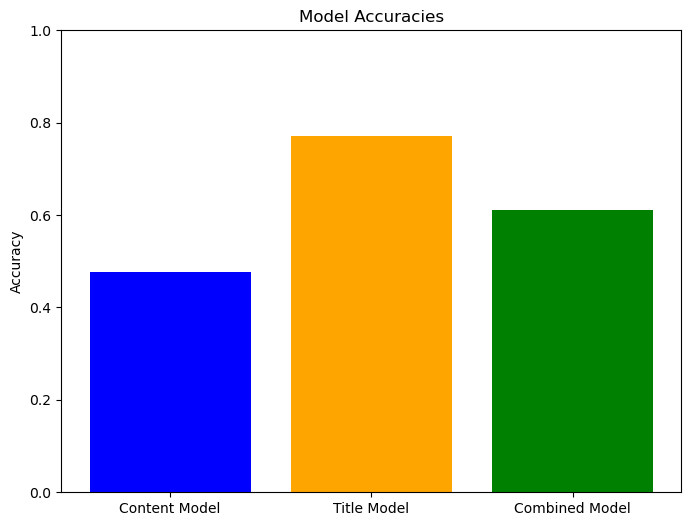

In [115]:
plt.figure(figsize=(8, 6))
plt.bar(models, model_accuracies, color=['blue', 'orange', 'green'])
plt.title('Model Accuracies')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Accuracy is between 0 and 1
plt.show()